In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(0)

In [3]:
G = nx.random_geometric_graph(100, 0.15)

In [4]:
# Define grid size (e.g., 5x5 grid)
rows, cols = 20, 20

# Create a grid graph
G = nx.grid_2d_graph(rows, cols)

# Convert node labels to integers (optional for simpler plotting)
G = nx.convert_node_labels_to_integers(G)

# Add diagonal edges to create Moore neighborhood
for i in range(rows):
    for j in range(cols):
        node = i * cols + j
        # Define all eight possible neighbors (Moore neighborhood)
        neighbors = [
            (i - 1, j), (i + 1, j),     # Up, Down
            (i, j - 1), (i, j + 1),     # Left, Right
            (i - 1, j - 1), (i - 1, j + 1),  # Top-left, Top-right
            (i + 1, j - 1), (i + 1, j + 1)   # Bottom-left, Bottom-right
        ]
        
        # Add edges to each valid neighbor within grid boundaries
        for ni, nj in neighbors:
            if 0 <= ni < rows and 0 <= nj < cols:
                neighbor_node = ni * cols + nj
                G.add_edge(node, neighbor_node)

#randomly remove 10% of the edges
edges = list(G.edges())

for i in range(int(0.3 * len(edges))):
    edge = random.choice(edges)
    G.remove_edge(*edge)
    edges.remove(edge)


In [5]:
def initGraphAndSetSeed(G, seeds):
    for node in G.nodes:
        G.nodes[node]['state'] = 0
        G.nodes[node]['activationTime'] = -1
        G.nodes[node]['T'] = 2

        if node in seeds:
            G.nodes[node]['state'] = 1
            G.nodes[node]['activationTime'] = 0

    return G

def plotGraph(G, rows, cols):
    # Draw the graph with a grid layout
    pos = {(i * cols + j): (j, -i) for i in range(rows) for j in range(cols)}
    plt.figure(figsize=(8, 8))
    node_colors = ['red' if G.nodes[node]['state'] == 1 else 'lightblue' for node in G.nodes]
    nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, node_size=50)
    
     # Draw nodes green with activationTime == 0
    red_border_nodes = [node for node in G.nodes if G.nodes[node]['activationTime'] == 0]
    nx.draw_networkx_nodes(G, pos, nodelist=red_border_nodes, node_size=100, node_color='green')

    # Draw the node number 292 blue
    nx.draw_networkx_nodes(G, pos, nodelist=[292], node_size=100, node_color='blue')
    
    plt.show()

def plotGraphWithActivationTime(G, rows, cols):
    #draw the graph with the acivation time as the node label
    pos = {(i * cols + j): (j, -i) for i in range(rows) for j in range(cols)}
    plt.figure(figsize=(8, 8))

    node_colors = ['red' if G.nodes[node]['state'] == 1 else 'lightblue' for node in G.nodes]
    node_labels = {node: G.nodes[node]['activationTime'] for node in G.nodes}
    nx.draw(G, pos=pos, with_labels=False, labels=node_labels, node_color=node_colors, node_size=50)
    
    # Draw nodes green with activationTime == 0
    red_border_nodes = [node for node in G.nodes if G.nodes[node]['activationTime'] == 0]
    nx.draw_networkx_nodes(G, pos, nodelist=red_border_nodes, node_size=100, node_color='green')

    # Draw the node number 292 blue
    nx.draw_networkx_nodes(G, pos, nodelist=[292], node_size=100, node_color='blue')
    
    plt.show()

def makeSpread(G):
    activation = True
    t = 0
    while activation:
        t += 1
        activation = False

        for node in G.nodes():
            if G.nodes[node]['state'] == 0:
                activeNeibs = 0
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 1 and G.nodes[neighbor]['activationTime'] < t:
                        activeNeibs += 1
                if activeNeibs >= G.nodes[node]['T']:
                    activation = True
                    G.nodes[node]['activationTime'] = t
                    G.nodes[node]['state'] = 1

    return G

def deactivateNodesWithHigherActivationTime(G, node):
    for n in G.nodes:
        if G.nodes[n]['activationTime'] > G.nodes[node]['activationTime']:
            G.nodes[n]['state'] = 0
            G.nodes[n]['activationTime'] = -1
    return G

def causalBacktrack(G, node):
    
    members, newMembers = [node], []

    member_added = True
    
    while member_added:
        member_added = False
        for member in members:
            for neighbor in G.neighbors(member):
                if G.nodes[neighbor]['state'] == 1 and G.nodes[neighbor]['activationTime'] < G.nodes[member]['activationTime']:
                    if neighbor not in members:
                        newMembers.append(neighbor)
                        member_added = True

        members += newMembers
    
    for node in G.nodes:
        if node not in members:
            G.nodes[node]['state'] = 0
            G.nodes[node]['activationTime'] = -1

    return G



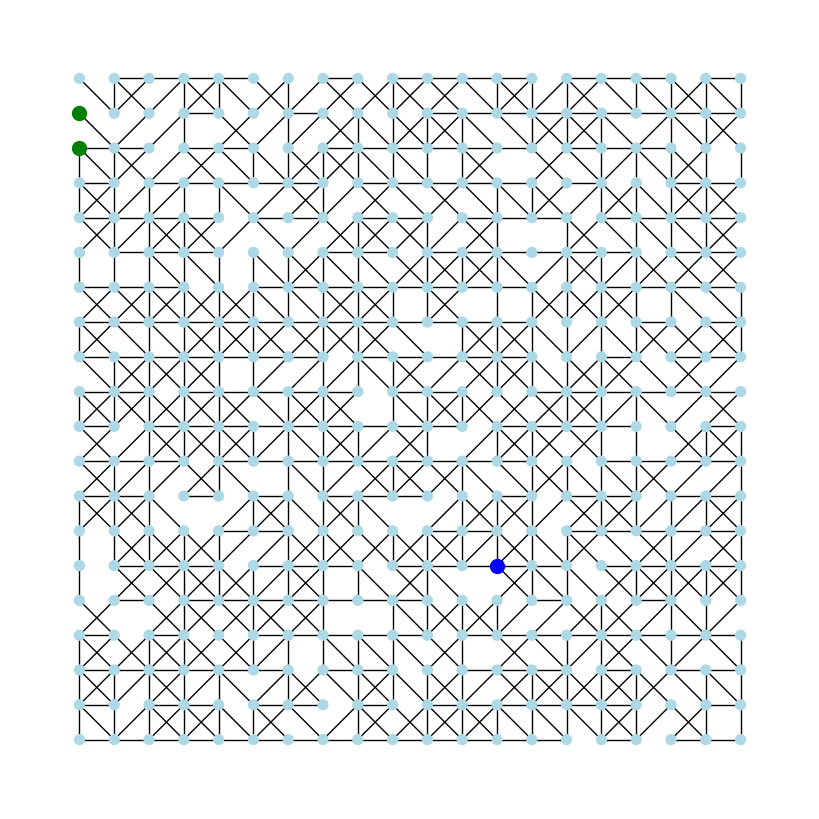

In [6]:
G = initGraphAndSetSeed(G, [20, 40])
plotGraph(G, rows, cols)

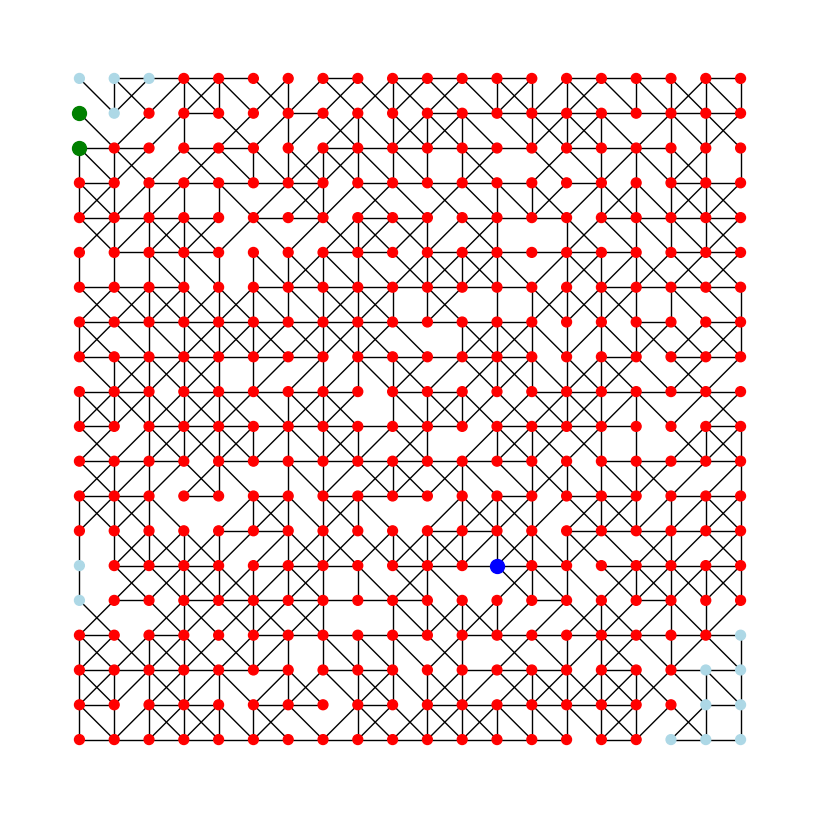

In [7]:
G = makeSpread(G)
plotGraph(G, rows, cols)

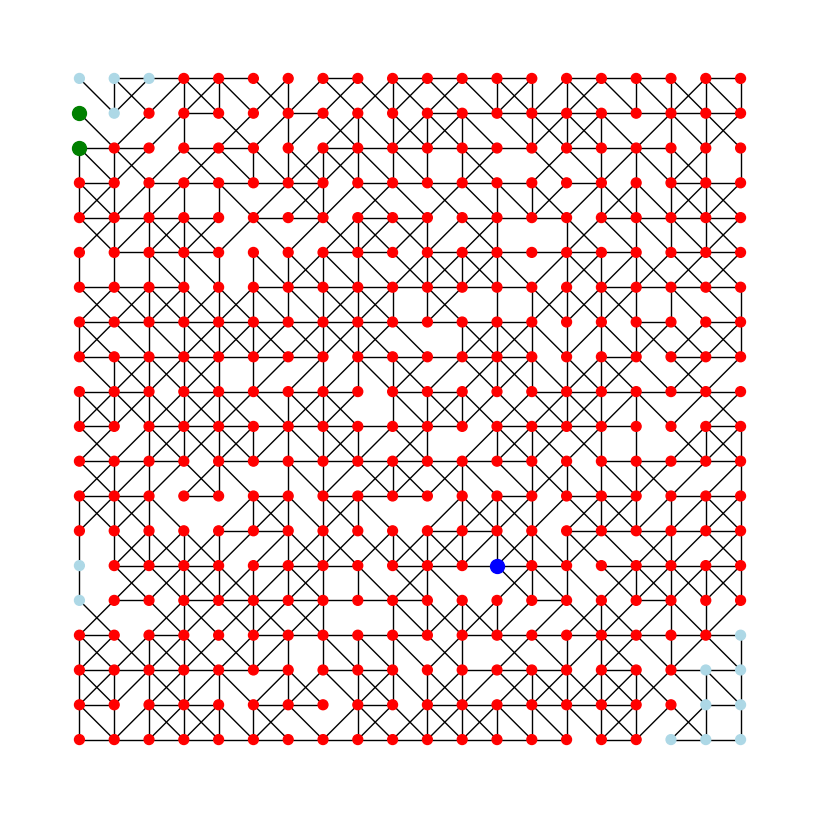

In [8]:
plotGraphWithActivationTime(G, rows, cols)

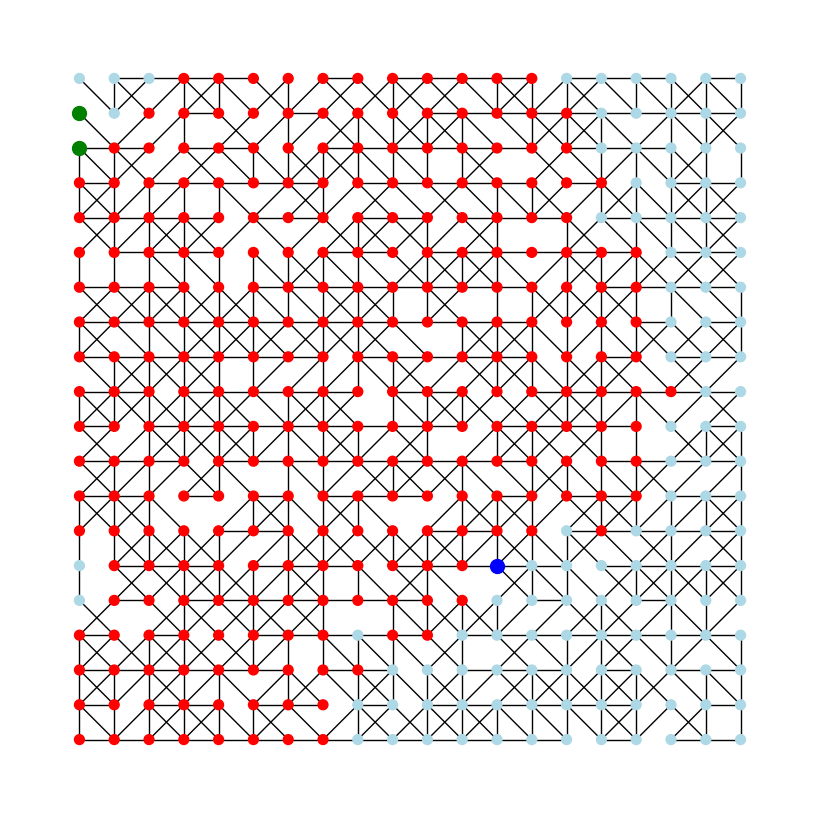

In [9]:
G = deactivateNodesWithHigherActivationTime(G, 292)
plotGraph(G, rows, cols)

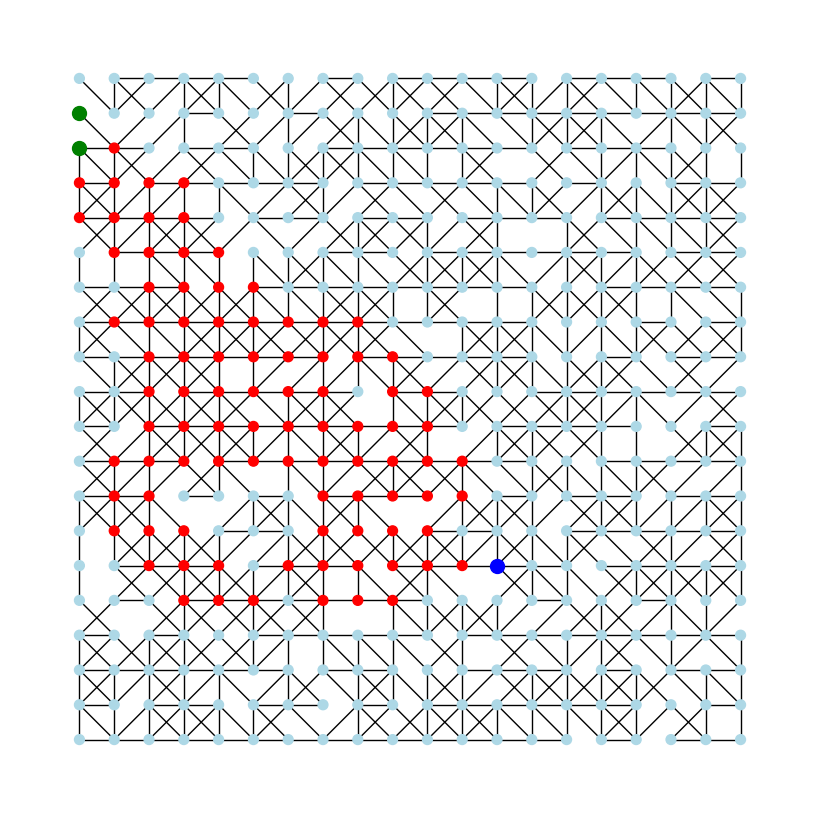

In [10]:
G = causalBacktrack(G, 291)
plotGraph(G, rows, cols)